In [1]:
#Gerekli kütüphaneler
import pandas as pd                  # Tablo işlemleri için (veri okuma, düzenleme)
import numpy as np                   # Sayısal işlemler için (dizi, matris vs.)
from sklearn.model_selection import train_test_split   # Eğitim test ayırma fonksiyonu
from sklearn.svm import SVC          # Support Vector Classifier (SVM)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Doğruluk ve hata ölçümleri
from sklearn.preprocessing import LabelEncoder        # Yazılı kategorik verileri sayıya çevirir
from sklearn.decomposition import PCA                 # Çok boyutlu veriyi 2 boyuta indirger (görselleştirme için)
import matplotlib.pyplot as plt       # Grafik çizimi
import seaborn as sns                # Gelişmiş grafik çizimi

In [2]:
#  Veri setini oku
veri = pd.read_csv("Iris.csv")       
veri = veri.drop("Id", axis=1)       # Sadece sıra numarası olan Id sütunu gereksiz siliyoruz

In [3]:
# Özellikleri (X) ve hedef değişkeni (y) ayır
X = veri.drop("Species", axis=1)     # X =çiçeğin ölçümleri (sayısal, modelin bakacağı veriler)
y = veri["Species"]                  # y = çiçeğin türü (çıktı.etiket - hangi sınıf?)


In [4]:
#Etiketleri sayıya çevir (çünkü SVM ve birçok algoritma sayılarla çalışır)
etiket_cevirici = LabelEncoder()
y_sayisal = etiket_cevirici.fit_transform(y)    # setosa"0, versicolor1, virginica2


In [5]:
# Her türden 10'ar test verisi ayır (stratejik seçiyoruz, rastgelelik de var)
test_indeks = []
for tur in np.unique(y_sayisal):                # Her bir türü (0,1, 2) sırayla dolaş
    tur_indeks = np.where(y_sayisal == tur)[0]  # O türe ait indeksleri bul
    np.random.seed(42)                          # Tekrar aynı sonuç için random seed
    secilen = np.random.choice(tur_indeks, 10, replace=False)  # O türden 10 tane test için seç
    test_indeks.extend(secilen)                 # Seçilenleri test indeksine ekle
tum_indeks = np.arange(len(y_sayisal))          # Tüm veri için indeksler
egitim_indeks = np.setdiff1d(tum_indeks, test_indeks)  # Eğitim verisi için kalanlar

X_egitim = X.iloc[egitim_indeks]                # Eğitim verisinin X'i (özellikleri)
y_egitim = y_sayisal[egitim_indeks]             # Eğitim verisinin türü (etiketi)
X_test = X.iloc[test_indeks]                    # Test verisinin X'i
y_test = y_sayisal[test_indeks]                 # Test verisinin türü

In [23]:
# SVM parametrelerini buradan değiştir (kernel: karar sınırının tipi)
cekirdek = "rbf"    # "poly", "linear", "rbf" (linear = düz, poly = polinom, rbf = radyal)
c_degeri = 1        # Marginin katılığı (büyük olursa hard margin, küçükse soft margin)
derece = 3          # Sadece poly kernel için: eğriliğin derecesi
gamma = 0.5         # Sadece rbf/poly için: karar sınırı ne kadar "kıvrımlı" olsun (küçük = düz, büyük = çok hassas)

In [24]:
# Modeli kur, eğit
if cekirdek == "poly":
    model = SVC(kernel=cekirdek, C=c_degeri, degree=derece, gamma=gamma)
elif cekirdek == "rbf":
    model = SVC(kernel=cekirdek, C=c_degeri, gamma=gamma)
else:
    model = SVC(kernel=cekirdek, C=c_degeri)

model.fit(X_egitim, y_egitim)  # Modeli eğit:Verilere bakarak matematiksel ayırım öğreniyor


SVC(C=1, gamma=0.5)

In [25]:
# Test verileriyle tahmin yap
y_tahmin = model.predict(X_test)    # Model hiç görmediği çiçeklere bakıp türünü tahmin eder


Kullanılan kernel: rbf
C: 1
gamma: 0.5

Doğruluk oranı: % 100.0

Sınıflandırma Raporu:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Karmaşıklık Matrisi (Confusion Matrix):
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


C:\Users\Ceren\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


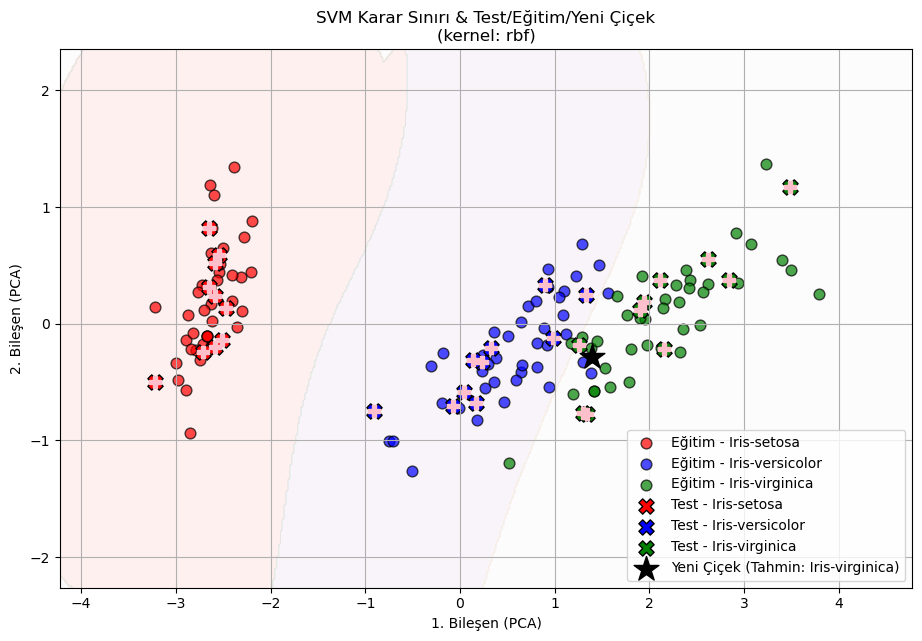

In [26]:
# Doğruluk hata metriklerini göster
print("\nKullanılan kernel:", cekirdek)
print("C:", c_degeri)
if cekirdek == "poly":
    print("degree:", derece)
if cekirdek in ["rbf", "poly"]:
    print("gamma:", gamma)

print("\nDoğruluk oranı: %", round(accuracy_score(y_test, y_tahmin)*100, 2))
# Doğruluk oranı %100 ise: testte model hiç hata yapmamış demek
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_tahmin, target_names=etiket_cevirici.classes_))
# Sınıflandırma raporu: precision (kesinlik), recall (bulma oranı), f1-score (denge) verir.
print("\nKarmaşıklık Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_tahmin))
# Karmaşıklık matrisi: köşegen dışında değer yoksa model bütün türleri doğru bilmiş demek

# PCA ile 2 boyuta indir (çünkü verinin 4 boyutunu çizmek imkansız)
# PCA - Principal Component Analysis
# Verinin bilgi bakımından en yoğun iki yönünü bulur, iki boyuta sıkıştırır
# Böylece hem bilgi kaybı az olur, hem grafikle ayırımı net görürüz
pca = PCA(n_components=2)                 # 2 bileşene (x ve y gibi) indir
X_pca = pca.fit_transform(X)              # Tüm veri 2 boyuta indirildi
X_egitim_pca = X_pca[egitim_indeks]       # Eğitim verisini de bu düzlemde göster
X_test_pca = X_pca[test_indeks]           # Test verisini de bu düzlemde göster

# PCA mantığı:Elinde dört boyutlu veriyi, bilgiyi kaybetmeden iki boyuta projeksiyon gibi çevirir
# Kitaptaki boncuk örneği: En geniş yayılan eksen x, ikinci y olur bilgi burada saklanır
# Asıl modelin başarısı testte ölçülür, PCA sadece görsel amaçlı

# Modeli 2 boyutlu eğitim verisine tekrar uydur (çünkü artık veriler farklı bir düzlemde)
model_pca = SVC(kernel=cekirdek, C=c_degeri, degree=derece, gamma=gamma)
model_pca.fit(X_egitim_pca, y_egitim)

# Karar sınırı için grid hazırla
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Burada grid (ızgara) tüm düzlemi küçük kutucuklara böler; her kutuda model hangi türü tahmin ediyor, onu Z'ye kaydeder

plt.figure(figsize=(11, 7))
plt.contourf(xx, yy, Z, alpha=0.2, cmap="Pastel1")  # Arka plan karar bölgeleri; hangi alan hangi tür için

renkler = ['red', 'blue', 'green']  # 0,1,2'ye sırayla atanacak (setosa, versicolor, virginica)

# Eğitim verileri: küçük daire (o), türüne göre renkli
for tur in np.unique(y_egitim):
    plt.scatter(X_egitim_pca[y_egitim == tur, 0], X_egitim_pca[y_egitim == tur, 1],
                c=renkler[tur], marker='o', edgecolor='k', s=60, alpha=0.7, 
                label=f'Eğitim - {etiket_cevirici.inverse_transform([tur])[0]}')

# Test verileri: büyük X, türüne göre renkli
for tur in np.unique(y_test):
    plt.scatter(X_test_pca[y_test == tur, 0], X_test_pca[y_test == tur, 1],
                c=renkler[tur], marker='X', edgecolor='black', s=120, 
                label=f'Test - {etiket_cevirici.inverse_transform([tur])[0]}')

# Test tahminleri (doğruysa pembe 'P', yanlışsa kırmızı 'P')
for i in range(len(y_test)):
    plt.scatter(X_test_pca[i, 0], X_test_pca[i, 1],
                marker="P",
                color="pink" if y_test[i]==y_tahmin[i] else "red",
                s=70, label=None)
# Bu kısımda P markerı ile test örneğinin doğru mu yanlış mı tahmin edildiğini ayırt ediyorsun
# Yeni bir çiçek örneği için:
yeni_cicek = [[5.9, 3.0, 5.1, 1.8]]  # Değerleri istediğin gibi değiştir (örnek: Iris-virginica boyutlarına yakın)
yeni_cicek_pca = pca.transform(yeni_cicek)           # Aynı PCA ile 2 boyuta indir
tahmin = model_pca.predict(yeni_cicek_pca)           # Model bu yeni çiçeğe hangi tür diyor?

# Yeni çiçek örneği: yıldız ile, rengi siyah (farklı olsun diye)
plt.scatter(yeni_cicek_pca[:, 0], yeni_cicek_pca[:, 1], color='black', marker='*', s=350, 
            label=f"Yeni Çiçek (Tahmin: {etiket_cevirici.inverse_transform(tahmin)[0]})")

plt.title(f"SVM Karar Sınırı & Test/Eğitim/Yeni Çiçek\n(kernel: {cekirdek})")  # Grafik başlığı, hangi kernel
plt.xlabel("1. Bileşen (PCA)")   # X ekseni adı (PCA'dan gelen ilk boyut)
plt.ylabel("2. Bileşen (PCA)")   # Y ekseni adı (PCA'dan gelen ikinci boyut)
plt.grid(True)                   # Arka planda ızgara çizgisi

# Legend'da aynı label'lar tekrar olmasın diye (her label'dan sadece bir tane göster):
handles, labels = plt.gca().get_legend_handles_labels()
from collections import OrderedDict
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=10)

plt.show()    # Grafiği göster